In [1]:
%matplotlib inline
import seaborn as sns

[Text(0, 0.5, 'training loss')]

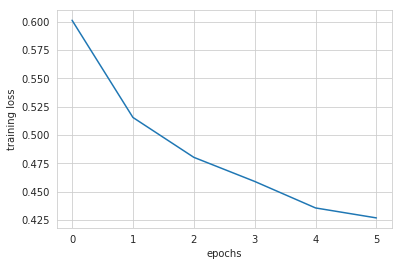

In [18]:
import json
data = []
sns.set_style("whitegrid")
with open("./training_cycle.json", "r") as f:
    data = json.loads(f.read())
g = sns.lineplot(range(len(data)), data)
g.set(xticks = range(len(data)))
g.set(xlabel = "epochs")
g.set(ylabel = "training loss")